### Dimension Reduction Task01

- 기대 수명 데이터세트를 회귀 분석 하되, 차원을 축소하여 진행해본다.

In [1]:
import pandas as pd

l_df = pd.read_csv('./datasets/life_expectancy.csv')
l_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
l_df.duplicated().sum()

0

In [3]:
l_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
pre_l_df = l_df.drop(labels=['Country', 'Year', 'Status'], axis=1)
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
pre_l_df.isna().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
# 타겟 종속변수의 결측치를 가진 행은 삭제합니다.
pre_l_df = pre_l_df[~pre_l_df['Life expectancy '].isna()]
pre_l_df.isna().sum()

Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [11]:
pre_l_df = pre_l_df[~pre_l_df['Alcohol'].isna()]
pre_l_df.isna().sum()

Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        530
Measles                              0
 BMI                                15
under-five deaths                    0
Polio                                7
Total expenditure                   37
Diphtheria                           7
 HIV/AIDS                            0
GDP                                407
Population                         606
 thinness  1-19 years               15
 thinness 5-9 years                 15
Income composition of resources    151
Schooling                          151
dtype: int64

In [12]:
pre_l_df = pre_l_df.drop(labels=['Population'], axis=1)
pre_l_df.isna().sum()

Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        530
Measles                              0
 BMI                                15
under-five deaths                    0
Polio                                7
Total expenditure                   37
Diphtheria                           7
 HIV/AIDS                            0
GDP                                407
 thinness  1-19 years               15
 thinness 5-9 years                 15
Income composition of resources    151
Schooling                          151
dtype: int64

In [13]:
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [14]:
pre_l_df = pre_l_df[~pre_l_df['Hepatitis B'].isna()]
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [15]:
pre_l_df.reset_index(drop=True, inplace=True)
pre_l_df.isna().sum()

Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                10
under-five deaths                    0
Polio                                0
Total expenditure                   19
Diphtheria                           0
 HIV/AIDS                            0
GDP                                338
 thinness  1-19 years               10
 thinness 5-9 years                 10
Income composition of resources    107
Schooling                          107
dtype: int64

In [16]:
pre_l_df = pre_l_df.drop(labels=['GDP'], axis=1)
pre_l_df.isna().sum()

Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                10
under-five deaths                    0
Polio                                0
Total expenditure                   19
Diphtheria                           0
 HIV/AIDS                            0
 thinness  1-19 years               10
 thinness 5-9 years                 10
Income composition of resources    107
Schooling                          107
dtype: int64

In [17]:
pre_l_df = pre_l_df.drop(labels=['Income composition of resources'], axis=1)
pre_l_df.isna().sum()

Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B                 0
Measles                     0
 BMI                       10
under-five deaths           0
Polio                       0
Total expenditure          19
Diphtheria                  0
 HIV/AIDS                   0
 thinness  1-19 years      10
 thinness 5-9 years        10
Schooling                 107
dtype: int64

In [21]:
pre_l_df = pre_l_df[~pre_l_df[' BMI '].isna()]
pre_l_df.isna().sum()

Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B                 0
Measles                     0
 BMI                        0
under-five deaths           0
Polio                       0
Total expenditure          19
Diphtheria                  0
 HIV/AIDS                   0
 thinness  1-19 years       0
 thinness 5-9 years         0
Schooling                 107
dtype: int64

In [22]:
pre_l_df = pre_l_df.drop(labels=['Schooling'], axis=1)
pre_l_df.isna().sum()

Life expectancy            0
Adult Mortality            0
infant deaths              0
Alcohol                    0
percentage expenditure     0
Hepatitis B                0
Measles                    0
 BMI                       0
under-five deaths          0
Polio                      0
Total expenditure         19
Diphtheria                 0
 HIV/AIDS                  0
 thinness  1-19 years      0
 thinness 5-9 years        0
dtype: int64

In [23]:
pre_l_df = pre_l_df[~pre_l_df['Total expenditure'].isna()]
pre_l_df = pre_l_df.reset_index(drop=True)
pre_l_df.isna().sum()

Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
 BMI                      0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
 HIV/AIDS                 0
 thinness  1-19 years     0
 thinness 5-9 years       0
dtype: int64

In [24]:
pre_l_df

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4
2172,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9
2173,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3
2174,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7


In [25]:
pre_l_df.corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
Life expectancy,1.000000,-0.716536,-0.194302,0.365385,0.388828,0.243720,-0.097579,0.510464,-0.216955,0.347908,0.153236,0.355349,-0.579110,-0.442203,-0.443044
Adult Mortality,-0.716536,1.000000,0.074223,-0.144810,-0.232298,-0.159412,0.028344,-0.357902,0.091944,-0.228247,-0.066213,-0.224372,0.539490,0.268470,0.281929
infant deaths,-0.194302,0.074223,1.000000,-0.105092,-0.088694,-0.233581,0.518880,-0.230200,0.996941,-0.162404,-0.115006,-0.169479,0.025877,0.436879,0.436088
Alcohol,0.365385,-0.144810,-0.105092,1.000000,0.321331,0.084243,-0.055979,0.281190,-0.100203,0.192005,0.276640,0.184610,-0.025976,-0.410892,-0.393299
percentage expenditure,0.388828,-0.232298,-0.088694,0.321331,1.000000,0.018298,-0.060027,0.219328,-0.089746,0.123560,0.106644,0.119082,-0.087216,-0.233281,-0.234393
Hepatitis B,0.243720,-0.159412,-0.233581,0.084243,0.018298,1.000000,-0.130282,0.153526,-0.242257,0.476570,0.068496,0.588764,-0.110870,-0.127536,-0.129587
Measles,-0.097579,0.028344,0.518880,-0.055979,-0.060027,-0.130282,1.000000,-0.159983,0.504938,-0.067652,-0.098354,-0.077454,0.007077,0.163579,0.160116
BMI,0.510464,-0.357902,-0.230200,0.281190,0.219328,0.153526,-0.159983,1.000000,-0.238111,0.195380,0.184794,0.181926,-0.214250,-0.508990,-0.516371
under-five deaths,-0.216955,0.091944,0.996941,-0.100203,-0.089746,-0.242257,0.504938,-0.238111,1.000000,-0.175651,-0.114951,-0.184838,0.038614,0.438317,0.436533
Polio,0.347908,-0.228247,-0.162404,0.192005,0.123560,0.476570,-0.067652,0.195380,-0.175651,1.000000,0.078568,0.575656,-0.120161,-0.157662,-0.167004


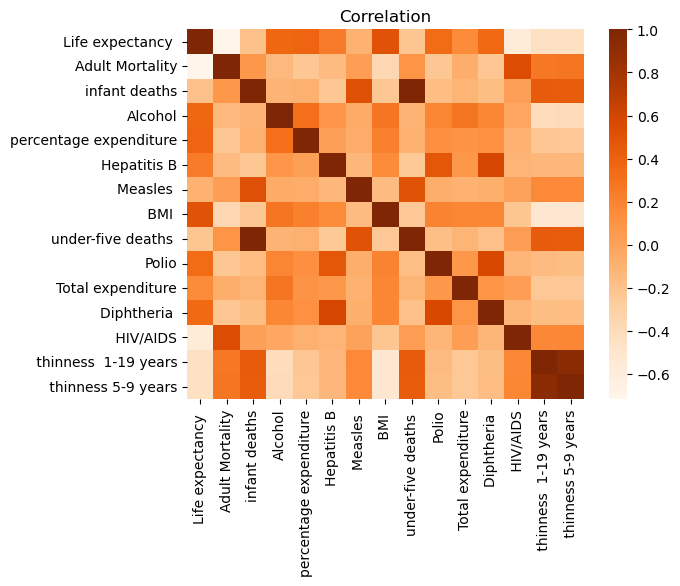

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = sns.heatmap(pre_l_df.corr(), cmap='Oranges')
corr.set_title('Correlation')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_l_df.iloc[:, 1:], pre_l_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

In [32]:
train_df = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [33]:
display(train_df)
display(test_df)

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Life expectancy
0,66.0,0,12.32,8350.193523,98.0,117,57.1,0,98.0,11.21,98.0,0.1,1.8,2.0,81.4
1,216.0,0,9.92,86.925540,99.0,2,57.0,0,99.0,6.37,99.0,0.1,2.5,2.5,76.0
2,179.0,103,7.13,149.480209,91.0,1,44.5,118,99.0,7.19,98.0,0.1,3.4,3.4,71.0
3,47.0,69,0.96,5.743394,74.0,2321,2.5,98,73.0,5.38,74.0,10.8,3.7,3.6,54.0
4,179.0,0,4.14,369.631710,88.0,0,26.4,0,88.0,4.24,88.0,0.1,7.9,7.9,71.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,119.0,4,0.61,535.278640,97.0,2,6.1,4,98.0,8.78,97.0,0.1,3.8,3.8,73.1
1736,16.0,0,9.45,0.000000,96.0,0,63.8,0,96.0,7.74,96.0,0.1,2.5,2.5,75.4
1737,114.0,28,8.21,0.000000,9.0,85,6.1,33,9.0,13.70,94.0,0.1,0.8,0.7,76.8
1738,241.0,150,1.84,86.825511,69.0,4347,16.4,221,7.0,5.77,69.0,1.2,1.7,1.5,63.3


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Life expectancy
0,122.0,8,0.80,0.000000,83.0,19,5.4,9,83.0,3.40,79.0,0.1,6.4,6.2,73.8
1,83.0,20,0.01,0.000000,99.0,189,57.2,23,98.0,6.49,98.0,0.1,8.2,8.3,75.3
2,76.0,0,8.02,3192.887363,95.0,40,64.3,0,99.0,9.77,99.0,0.1,0.8,0.7,85.0
3,11.0,4,1.19,257.287870,94.0,231,48.9,5,98.0,5.29,98.0,0.1,6.5,6.4,73.2
4,146.0,5,1.69,72.428089,32.0,65,15.6,5,98.0,3.95,99.0,0.1,15.4,15.5,73.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,199.0,0,13.94,1147.111400,97.0,64,61.7,0,97.0,5.69,97.0,0.1,1.9,2.0,72.0
432,74.0,0,2.16,142.098982,95.0,211,29.2,0,94.0,2.84,94.0,0.1,2.1,2.0,79.0
433,142.0,1,2.90,32.756269,55.0,15,47.1,1,96.0,6.25,93.0,0.1,2.1,2.2,72.0
434,99.0,0,12.69,0.000000,99.0,0,63.6,0,99.0,7.43,99.0,0.1,1.9,2.0,77.5


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(1740, 2) (436, 2)


In [35]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['Life expectancy ']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['Life expectancy ']

In [36]:
display(pca_train_df)
display(pca_test_df)

,pca1,pca2,target
0,-1898.470831,7672.230591,81.4
1,-1930.626322,-592.921328,76.0
2,-1930.781125,-530.772643,71.0
3,390.088126,-648.912960,54.0
4,-1935.451279,-309.812952,71.5
...,...,...,...
1735,-1935.072887,-143.254278,73.1
1736,-1931.802762,-676.586736,75.4
1737,-1846.323536,-677.879634,76.8
1738,2416.522082,-551.546022,63.3


,pca1,pca2,target
0,-2230.301052,-644.691912,73.8
1,-2060.231023,-641.654177,75.3
2,-2250.130718,2548.685115,85.0
3,-2021.797644,-382.254993,73.2
4,-2185.244080,-572.084950,73.9
...,...,...,...
431,-2199.983844,501.355214,72.0
432,-2040.316875,-498.973485,79.0
433,-2234.815707,-612.152698,72.0
434,-2249.481117,-644.115873,77.5


In [37]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.97265482 0.02683049]
0.9994853024824814


In [48]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [50]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 57.5688, RMSE: 7.5874, R2: 0.1871


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# import sklearn
# sklearn.metrics.SCORERS.keys()

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfr = RandomForestRegressor()

g_rfr = GridSearchCV(rfr, param_grid=parameters, cv=5, return_train_score=True, scoring='r2', n_jobs=-1)
g_rfr.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='r2')

In [44]:
result_df = pd.DataFrame(g_rfr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.379311,2
1,"{'max_depth': 5, 'min_samples_split': 50}",0.380027,1
2,"{'max_depth': 5, 'min_samples_split': 100}",0.374770,4
3,"{'max_depth': 10, 'min_samples_split': 10}",0.356336,8
4,"{'max_depth': 10, 'min_samples_split': 50}",0.375490,3
5,"{'max_depth': 10, 'min_samples_split': 100}",0.371215,7
6,"{'max_depth': 20, 'min_samples_split': 10}",0.334852,9
7,"{'max_depth': 20, 'min_samples_split': 50}",0.371452,6
8,"{'max_depth': 20, 'min_samples_split': 100}",0.372600,5


In [46]:
rfr = g_rfr.best_estimator_
prediction = rfr.predict(pca_test_df.iloc[:, :-1])
get_evaluation(pca_test_df.iloc[:, -1], prediction)

MSE: 55.9293, RMSE: 7.4786, R2: 0.2104


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(1740, 3) (436, 3)


In [52]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['Life expectancy ']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['Life expectancy ']

In [53]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[9.72654817e-01 2.68304858e-02 3.20259734e-04]
0.9998055622165406


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [55]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 53.7587, RMSE: 7.3320, R2: 0.2409


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# import sklearn
# sklearn.metrics.SCORERS.keys()

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfr = RandomForestRegressor()

g_rfr = GridSearchCV(rfr, param_grid=parameters, cv=5, return_train_score=True, scoring='r2', n_jobs=-1)
g_rfr.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='r2')

In [57]:
result_df = pd.DataFrame(g_rfr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.567288,5
1,"{'max_depth': 5, 'min_samples_split': 50}",0.560000,8
2,"{'max_depth': 5, 'min_samples_split': 100}",0.554994,9
3,"{'max_depth': 10, 'min_samples_split': 10}",0.582489,2
4,"{'max_depth': 10, 'min_samples_split': 50}",0.577956,3
5,"{'max_depth': 10, 'min_samples_split': 100}",0.566524,6
6,"{'max_depth': 20, 'min_samples_split': 10}",0.583739,1
7,"{'max_depth': 20, 'min_samples_split': 50}",0.577672,4
8,"{'max_depth': 20, 'min_samples_split': 100}",0.564785,7


In [58]:
rfr = g_rfr.best_estimator_
prediction = rfr.predict(pca_test_df.iloc[:, :-1])
get_evaluation(pca_test_df.iloc[:, -1], prediction)

MSE: 34.5426, RMSE: 5.8773, R2: 0.5123


In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.fit_transform(test_df.iloc[:, :-1])

print(pca_train.shape, pca_test.shape)

(1740, 4) (436, 4)


In [60]:
pca_columns = [f'pca{i+1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df['Life expectancy ']

pca_columns = [f'pca{i+1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df['Life expectancy ']

In [61]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[9.72654817e-01 2.68304858e-02 3.20259734e-04 1.70387008e-04]
0.999975949224796


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# import sklearn
# sklearn.metrics.SCORERS.keys()

features, targets = pca_train_df.iloc[:, :-1], pca_train_df.iloc[:, -1]
parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [10, 50, 100]
}

rfr = RandomForestRegressor()

g_rfr = GridSearchCV(rfr, param_grid=parameters, cv=5, return_train_score=True, scoring='r2', n_jobs=-1)
g_rfr.fit(features, targets)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='r2')

In [63]:
result_df = pd.DataFrame(g_rfr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'min_samples_split': 10}",0.798455,5
1,"{'max_depth': 5, 'min_samples_split': 50}",0.785905,6
2,"{'max_depth': 5, 'min_samples_split': 100}",0.756128,9
3,"{'max_depth': 10, 'min_samples_split': 10}",0.850311,2
4,"{'max_depth': 10, 'min_samples_split': 50}",0.820375,4
5,"{'max_depth': 10, 'min_samples_split': 100}",0.774594,7
6,"{'max_depth': 20, 'min_samples_split': 10}",0.851368,1
7,"{'max_depth': 20, 'min_samples_split': 50}",0.821566,3
8,"{'max_depth': 20, 'min_samples_split': 100}",0.774036,8


In [64]:
rfr = g_rfr.best_estimator_
prediction = rfr.predict(pca_test_df.iloc[:, :-1])
get_evaluation(pca_test_df.iloc[:, -1], prediction)

MSE: 13.7433, RMSE: 3.7072, R2: 0.8060
